<a href="https://colab.research.google.com/github/vicsladk/IBMTest/blob/main/Removendo_Duplicatas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Tarefa 1: Identificar Linhas Duplicadas
Conte o número de linhas duplicadas no conjunto de dados.
Exiba as primeiras linhas duplicadas para entender sua estrutura.

In [10]:
# Conte o número de linhas duplicadas no conjunto de dados.
num_duplicadas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicadas}")

Número de linhas duplicadas: 20


In [11]:
# Exiba as primeiras linhas duplicadas para entender sua estrutura.
primeiras_duplicadas = df[df.duplicated(keep=False)].head()
print("\nPrimeiras linhas duplicadas:")
primeiras_duplicadas


Primeiras linhas duplicadas:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Pergunta 2: Analisar Características de Duplicatas

Identifique linhas duplicadas com base em colunas selecionadas, como Filial Principal, Emprego e Trabalho Remoto. Analise quais colunas frequentemente contêm valores idênticos nessas linhas duplicadas.

Analise as características das linhas duplicadas com base em um subconjunto de colunas, como Filial Principal, Emprego e Trabalho Remoto. Determine quais colunas frequentemente apresentam valores idênticos nessas linhas.

In [13]:
# Identificar linhas duplicadas com base em colunas selecionadas
colunas_selecionadas = ['MainBranch', 'Employment', 'RemoteWork']
duplicadas_selecionadas = df[df.duplicated(subset=colunas_selecionadas, keep=False)]

print("\nPrimeiras linhas duplicadas com base em colunas selecionadas:")
print(duplicadas_selecionadas.head())



Primeiras linhas duplicadas com base em colunas selecionadas:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                          

In [15]:
# Analisar quais colunas frequentemente contêm valores idênticos nessas linhas duplicadas

# Para cada coluna selecionada, contar o número de vezes que os valores são os mesmos em linhas duplicadas
contagem_valores_iguais = {}
for coluna in colunas_selecionadas:
  # Filtra as linhas que são duplicadas com base no subconjunto e verifica se o valor na coluna atual é o mesmo nas duplicatas
  contagem_valores_iguais[coluna] = duplicadas_selecionadas.groupby(colunas_selecionadas)[coluna].transform('size')

print("\nContagem de valores idênticos em colunas selecionadas para linhas duplicadas:")
for coluna, contagem in contagem_valores_iguais.items():
    # Como a contagem é um Series, precisamos verificar os valores únicos na contagem.
    # Um valor de contagem maior que 1 indica que o valor na coluna é o mesmo para múltiplas linhas.
    print(f"- '{coluna}': {len(contagem[contagem > 1].unique())} grupos de duplicatas com valores idênticos nesta coluna")



Contagem de valores idênticos em colunas selecionadas para linhas duplicadas:
- 'MainBranch': 95 grupos de duplicatas com valores idênticos nesta coluna
- 'Employment': 95 grupos de duplicatas com valores idênticos nesta coluna
- 'RemoteWork': 95 grupos de duplicatas com valores idênticos nesta coluna



Análise detalhada das colunas duplicadas com base no subconjunto:

Análise para a coluna: 'MainBranch'
Frequência de valores nesta coluna dentro das linhas duplicadas:
MainBranch
I am a developer by profession                                                           50173
I am not primarily a developer, but I write code sometimes as part of my work/studies     6471
I am learning to code                                                                     3847
I code primarily as a hobby                                                               3317
I used to be a developer by profession, but no longer am                                  1482
Name: count, dtype: int64


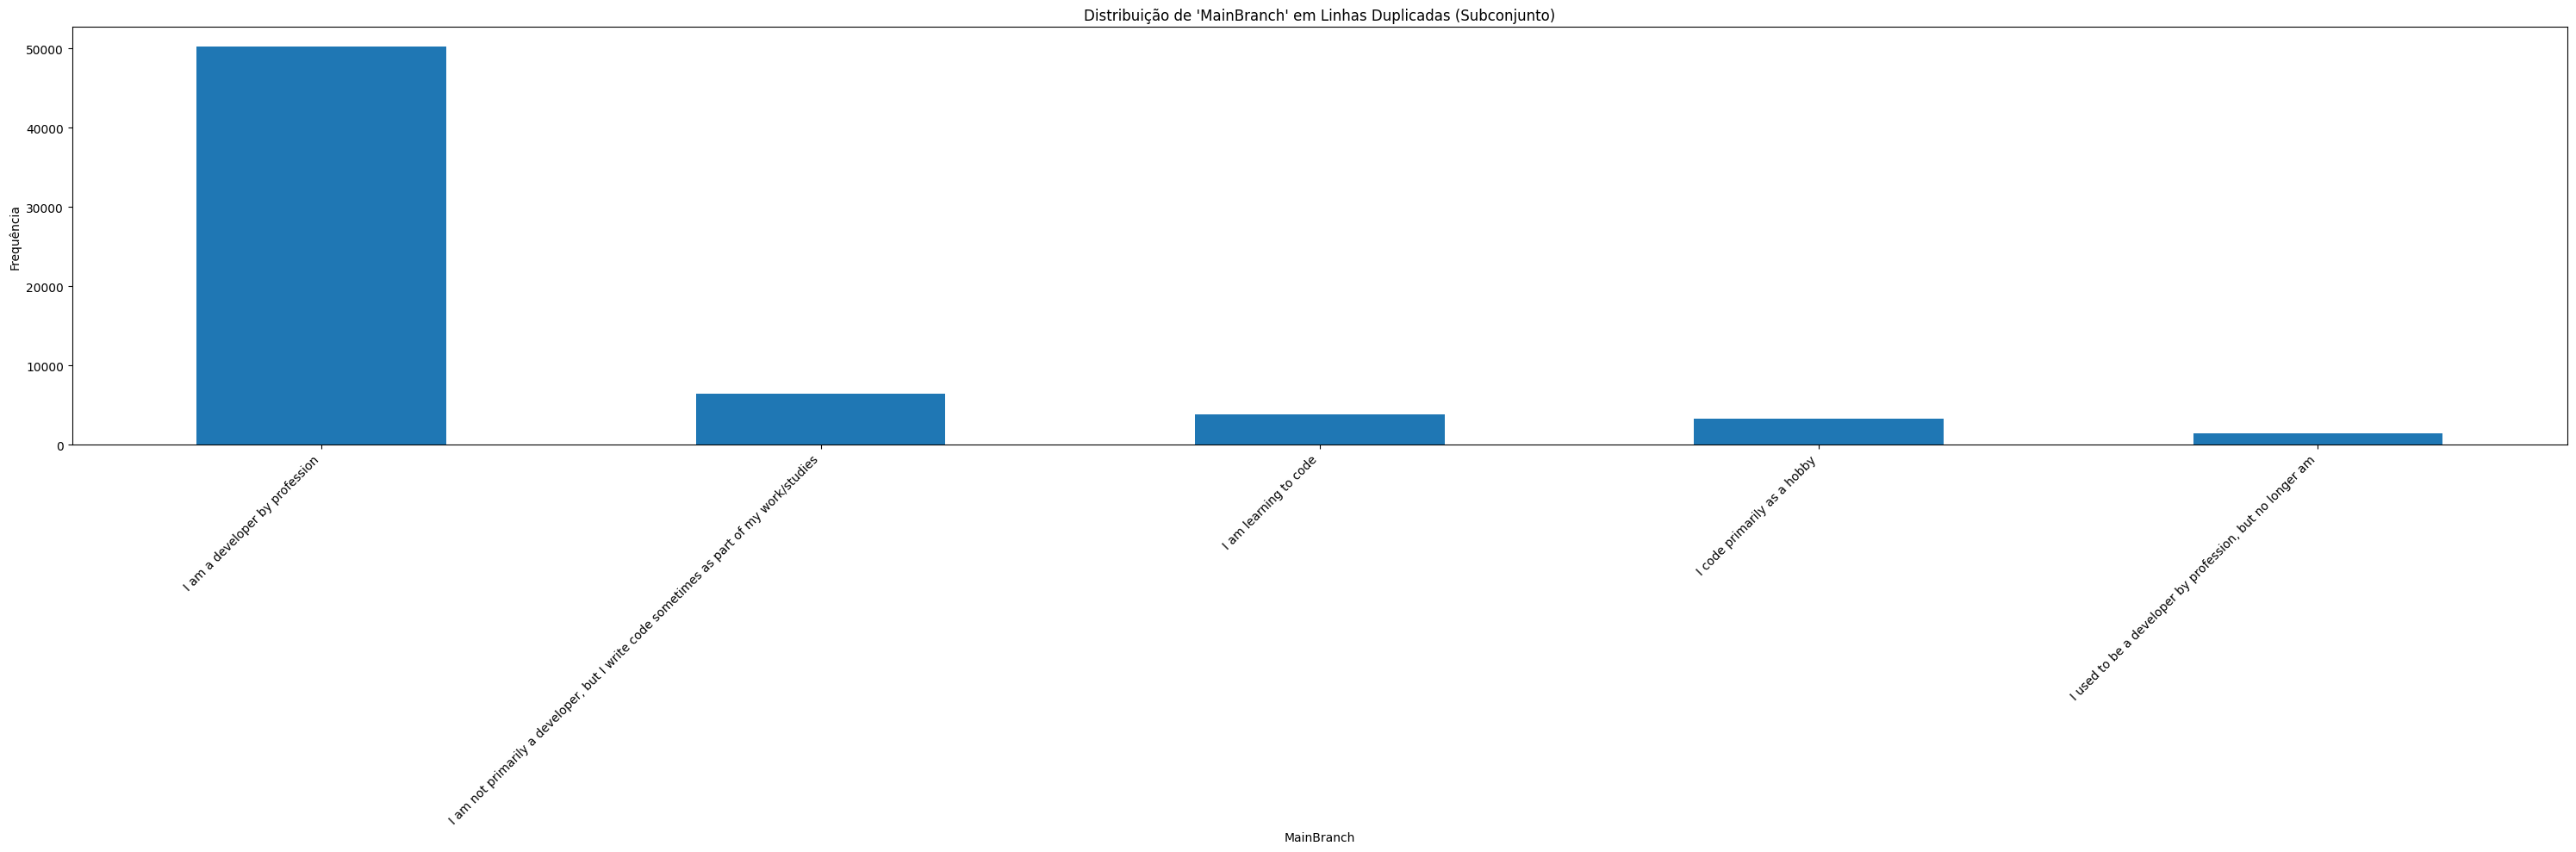


Análise para a coluna: 'Employment'
Frequência de valores nesta coluna dentro das linhas duplicadas:
Employment
Employed, full-time                                                                                                                                                       39048
Independent contractor, freelancer, or self-employed                                                                                                                       4845
Student, full-time                                                                                                                                                         4713
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                   3558
Not employed, but looking for work                                                                                                                                         2341
       

/tmp/ipython-input-17-632966482.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


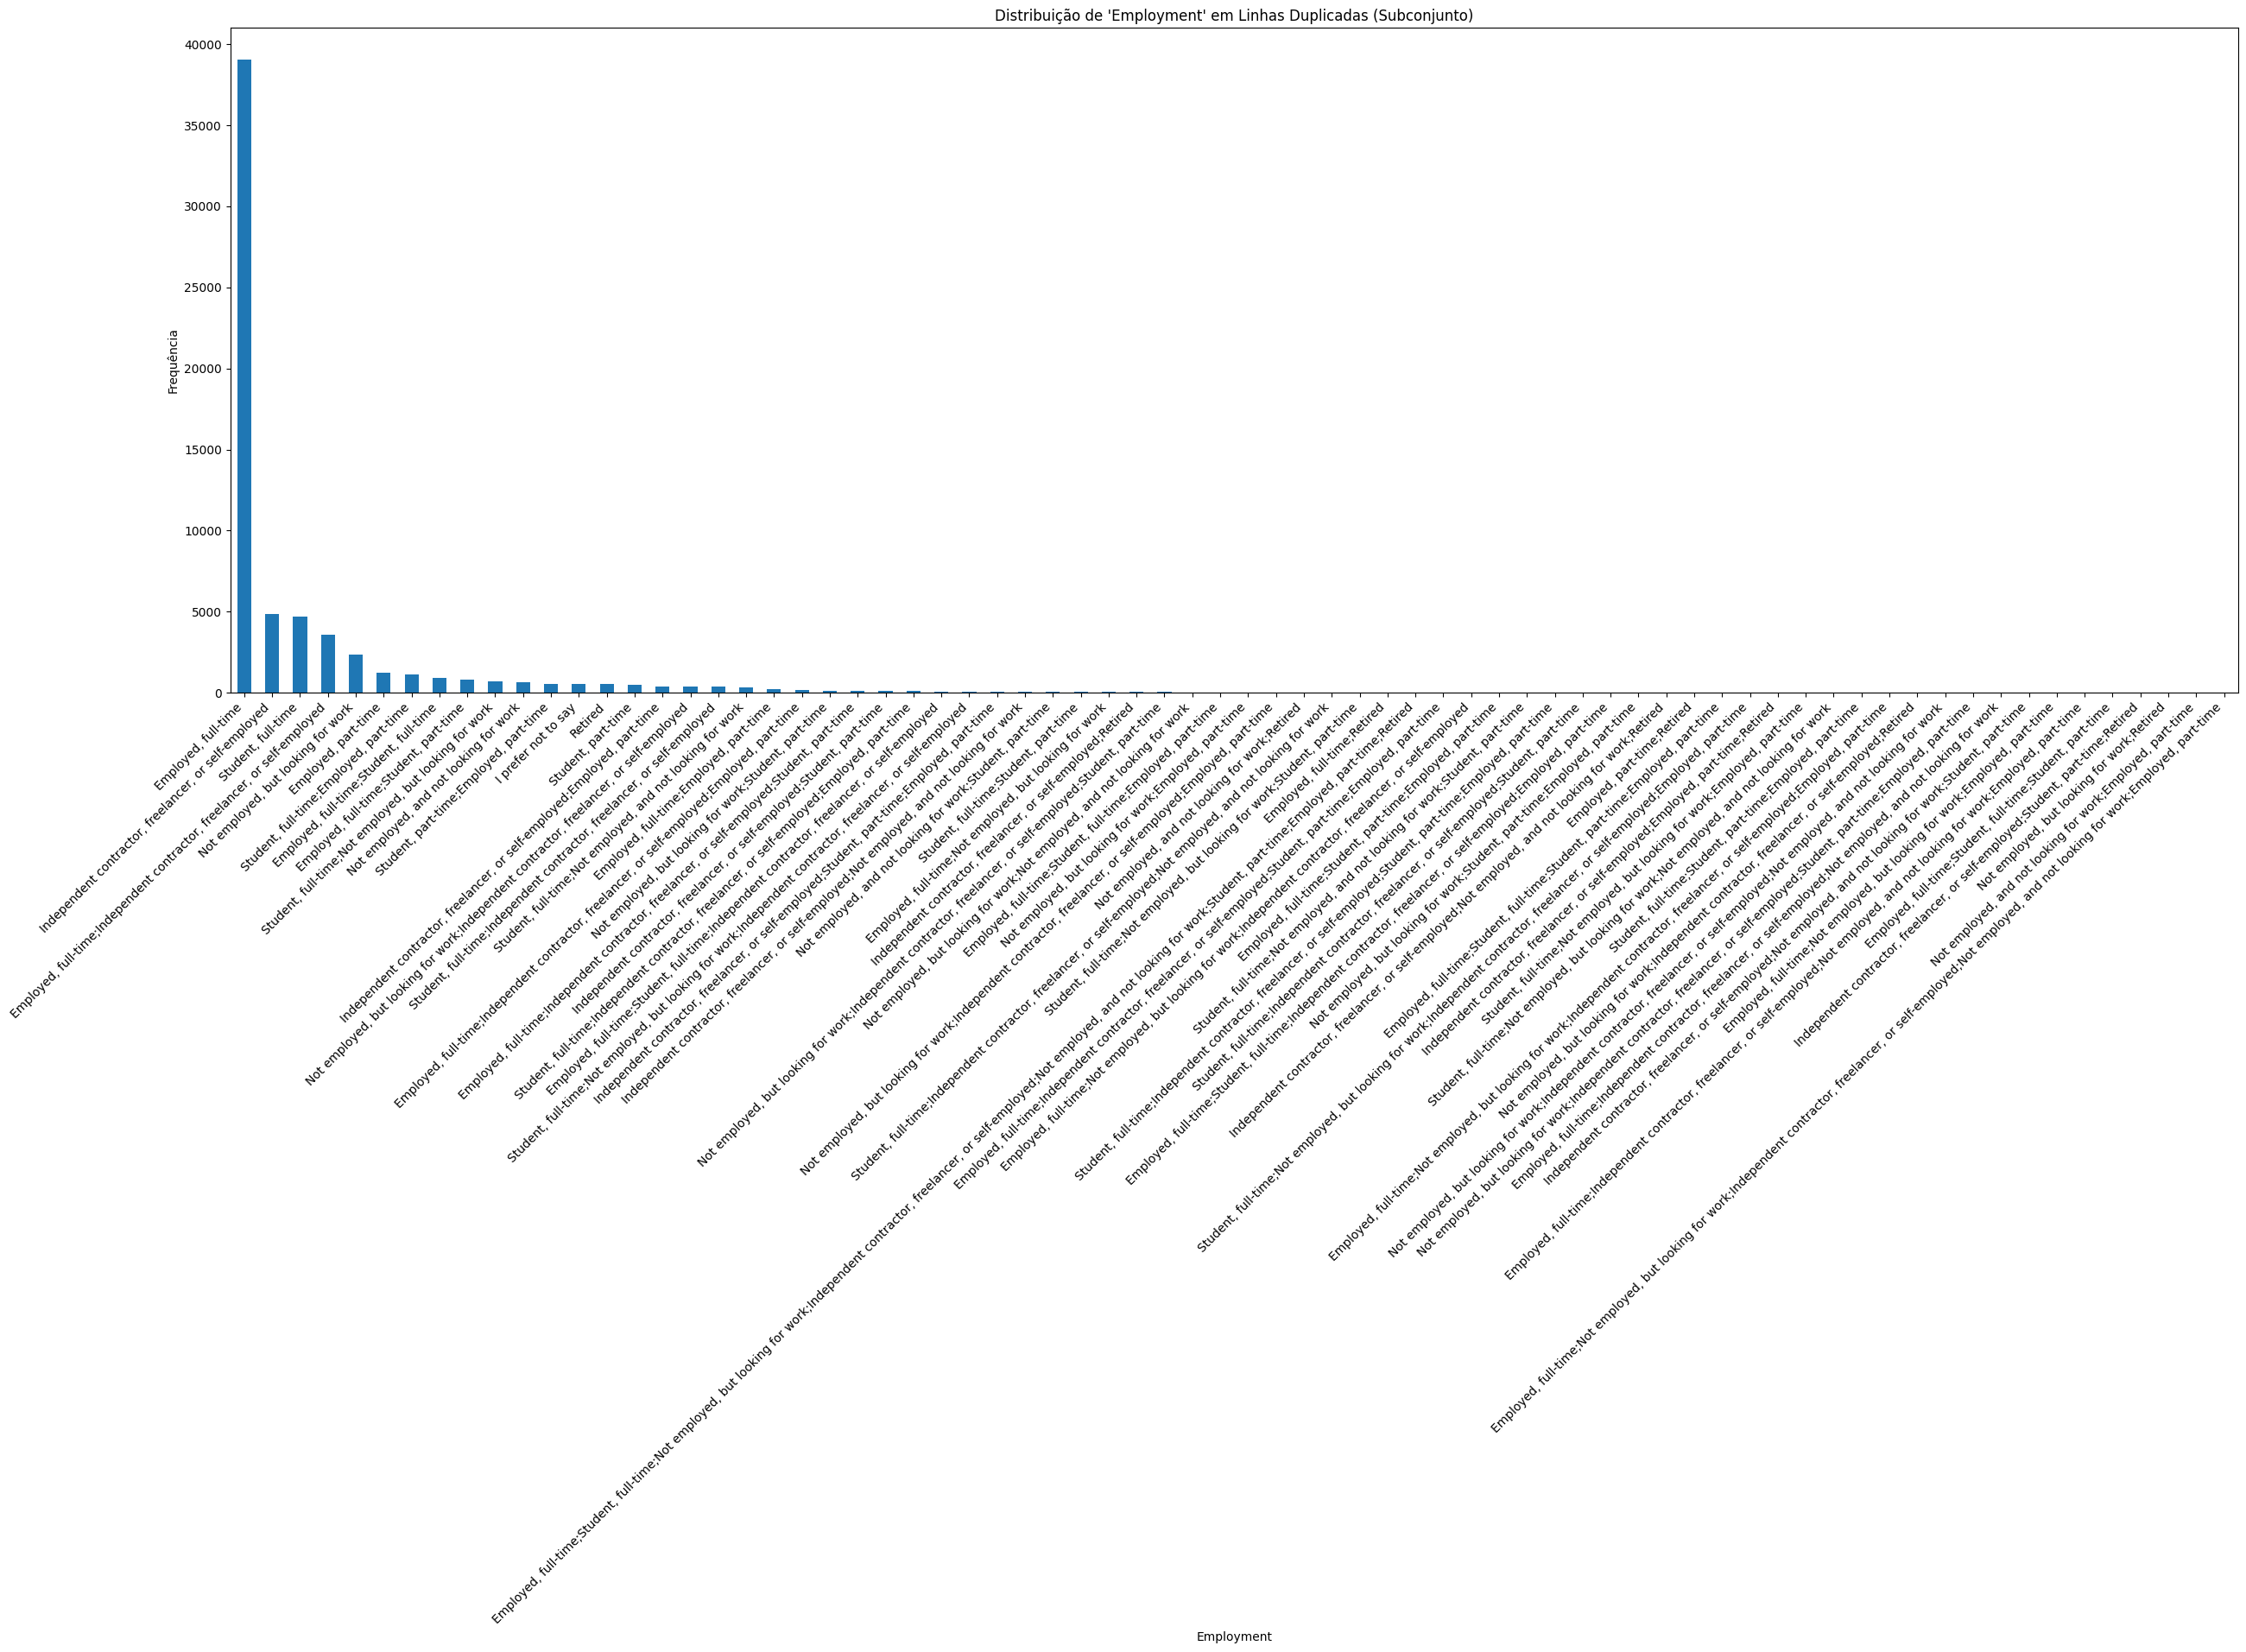


Análise para a coluna: 'RemoteWork'
Frequência de valores nesta coluna dentro das linhas duplicadas:
RemoteWork
Hybrid (some remote, some in-person)    22977
Remote                                  20788
In-person                               10925
Name: count, dtype: int64


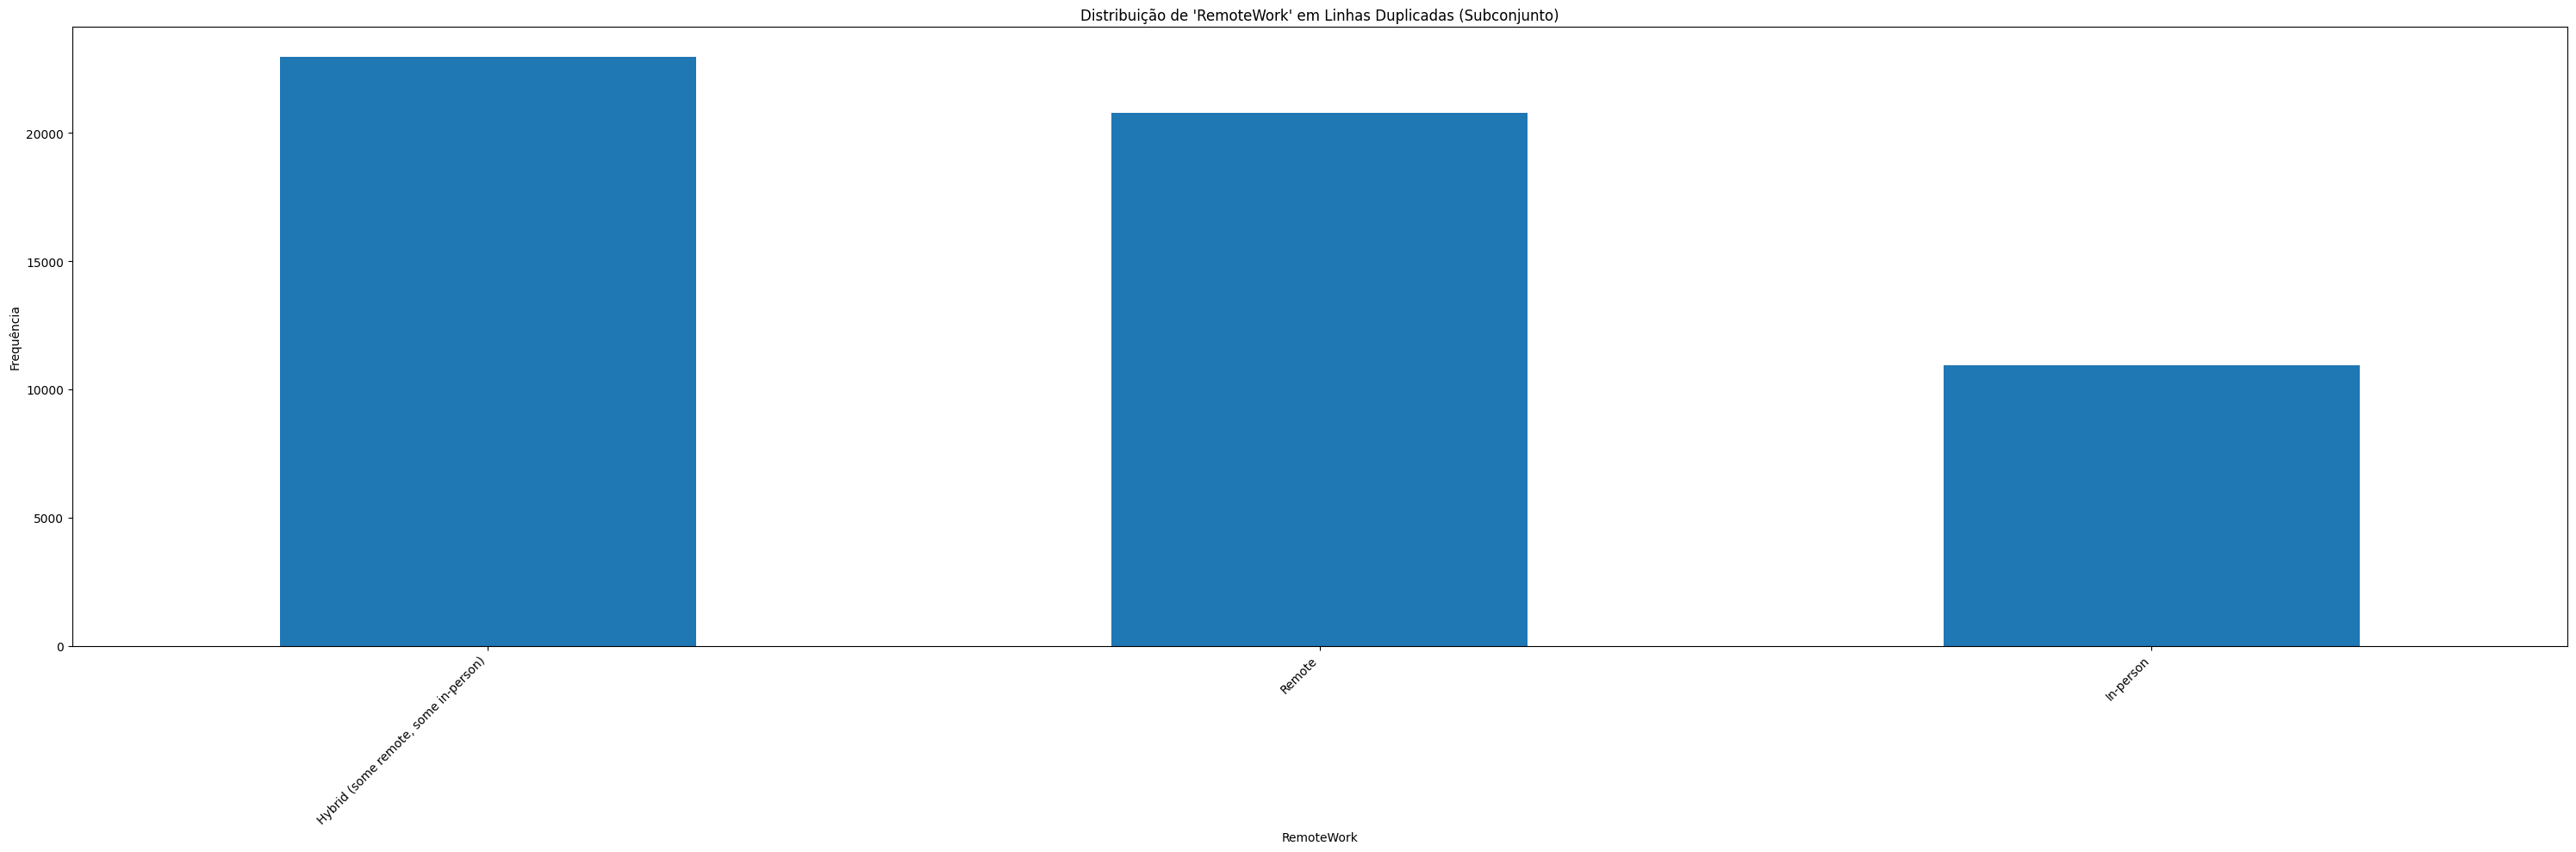


Conclusão:
Ao analisar as frequências dos valores em cada coluna dentro do subconjunto de linhas duplicadas ('MainBranch', 'Employment', 'RemoteWork'), podemos inferir quais colunas frequentemente apresentam valores idênticos. As colunas com uma distribuição de frequência skewed, onde um ou poucos valores dominam, indicam que esses valores são repetidos com mais frequência nas linhas duplicadas com base neste subconjunto.
A visualização em barras ajuda a identificar rapidamente quais valores são mais comuns em cada coluna para as linhas duplicadas selecionadas.
As colunas onde os valores mais frequentes têm uma contagem significativamente alta são aquelas que frequentemente apresentam valores idênticos nessas linhas duplicadas.


In [17]:
# Análise mais aprofundada das colunas duplicadas com base no subconjunto
print("\nAnálise detalhada das colunas duplicadas com base no subconjunto:")

for coluna in colunas_selecionadas:
    print(f"\nAnálise para a coluna: '{coluna}'")
    # Obter os valores na coluna para as linhas duplicadas selecionadas
    valores_coluna_duplicadas = duplicadas_selecionadas[coluna]

    # Contar a frequência de cada valor nesta coluna dentro do subconjunto de duplicatas
    frequencia_valores = valores_coluna_duplicadas.value_counts()
    print("Frequência de valores nesta coluna dentro das linhas duplicadas:")
    print(frequencia_valores)

    # Opcionalmente, você pode visualizar a distribuição dos valores para cada coluna no subconjunto de duplicatas
    plt.figure(figsize=(30, 10))
    frequencia_valores.plot(kind='bar')
    plt.title(f"Distribuição de '{coluna}' em Linhas Duplicadas (Subconjunto)")
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Conclusão baseada na análise das frequências:
print("\nConclusão:")
print("Ao analisar as frequências dos valores em cada coluna dentro do subconjunto de linhas duplicadas ('MainBranch', 'Employment', 'RemoteWork'), podemos inferir quais colunas frequentemente apresentam valores idênticos. As colunas com uma distribuição de frequência skewed, onde um ou poucos valores dominam, indicam que esses valores são repetidos com mais frequência nas linhas duplicadas com base neste subconjunto.")
print("A visualização em barras ajuda a identificar rapidamente quais valores são mais comuns em cada coluna para as linhas duplicadas selecionadas.")
print("As colunas onde os valores mais frequentes têm uma contagem significativamente alta são aquelas que frequentemente apresentam valores idênticos nessas linhas duplicadas.")

Tarefa 3: Visualizar a Distribuição de Duplicatas

Crie visualizações para mostrar a distribuição de duplicatas em diferentes categorias.

Use gráficos de barras ou de pizza para representar a distribuição de duplicatas por País e Emprego.

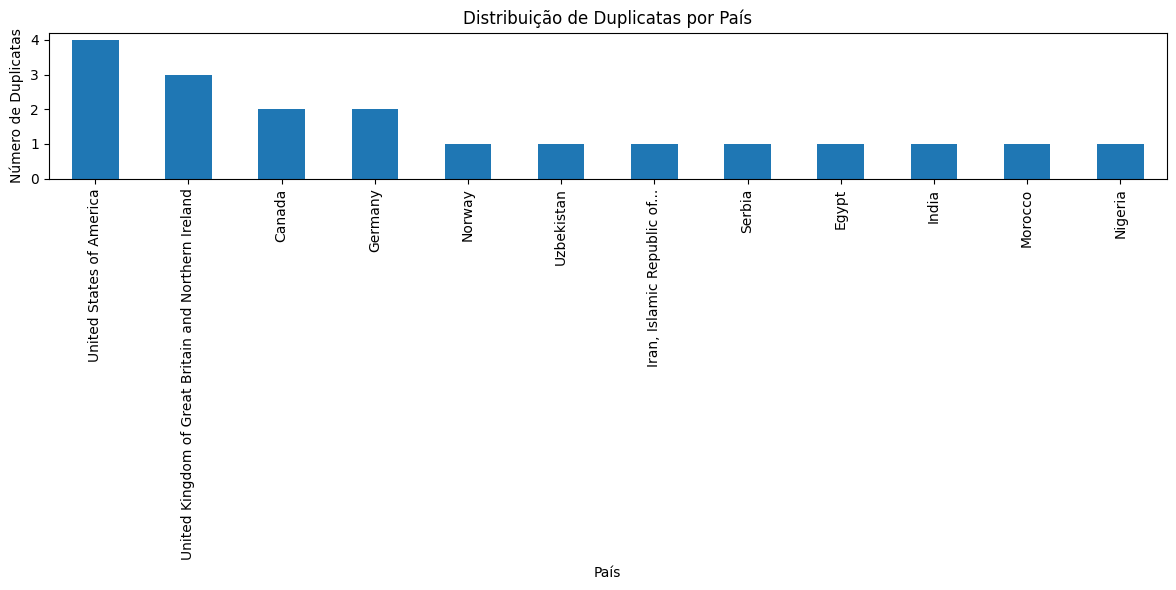

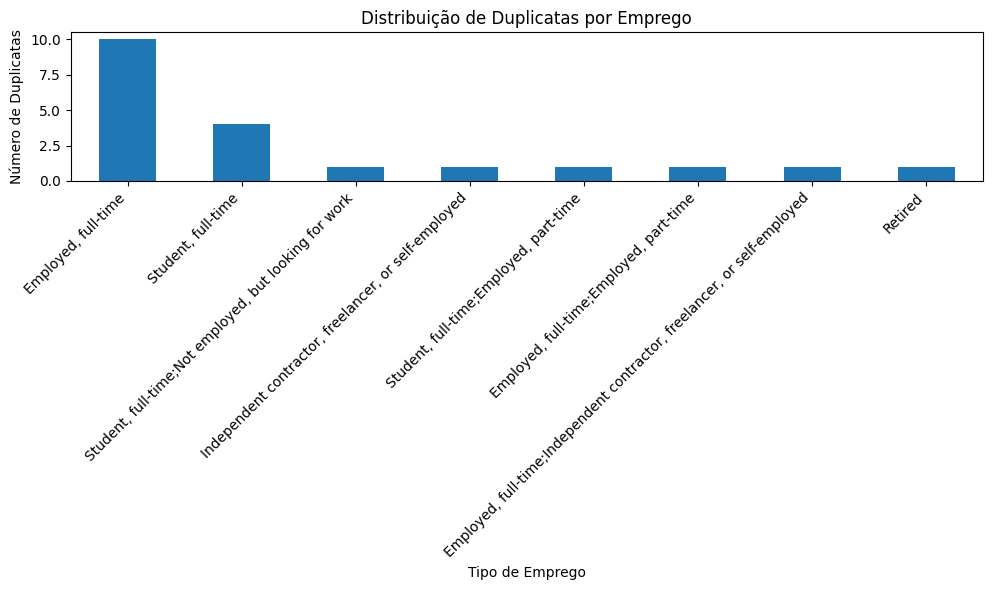

In [18]:
# Identificar as linhas que são duplicatas
duplicatas_mask = df.duplicated()
df_duplicatas = df[duplicatas_mask]

# Visualizar a distribuição de duplicatas por 'Country'
plt.figure(figsize=(12, 6))
df_duplicatas['Country'].value_counts().plot(kind='bar')
plt.title('Distribuição de Duplicatas por País')
plt.xlabel('País')
plt.ylabel('Número de Duplicatas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualizar a distribuição de duplicatas por 'Employment'
plt.figure(figsize=(10, 6))
df_duplicatas['Employment'].value_counts().plot(kind='bar')
plt.title('Distribuição de Duplicatas por Emprego')
plt.xlabel('Tipo de Emprego')
plt.ylabel('Número de Duplicatas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pergunta 4: Remoção Estratégica de Duplicatas

Decida quais colunas são críticas para definir a unicidade no conjunto de dados.

Remova duplicatas com base em um subconjunto de colunas se a duplicação completa de linhas não for um bom critério.

In [19]:
# Com base na análise anterior (Tarefa 2 e 3), identifiquei colunas que são críticas para definir a unicidade de cada observação. Isso depende do contexto do conjunto de dados.

# Para este conjunto de dados de pesquisa, 'ResponseId' parece ser um bom candidato para identificar respostas únicas. No entanto, a análise da Tarefa 1 mostrou que há duplicatas exatas de linha, o que pode indicar que um mesmo ResponseId apareceu mais de uma vez, ou que múltiplos ResponseIds tinham exatamente os mesmos dados. Se 'ResponseId' for garantido como único por projeto, então as duplicatas exatas de linha podem ser erros.

colunas_para_unicidade = ['ResponseId']

# Remova duplicatas com base no subconjunto de colunas definido acima.
# O parâmetro 'keep' decide qual duplicata manter:
# 'first': mantém a primeira ocorrência
# 'last': mantém a última ocorrência
# False: remove todas as ocorrências se houver duplicatas
df_sem_duplicatas_subconjunto = df.drop_duplicates(subset=colunas_para_unicidade, keep='first')

# Verifique o número de linhas após a remoção de duplicatas com base no subconjunto
num_linhas_apos_remocao_subconjunto = len(df_sem_duplicatas_subconjunto)
print(f"\nNúmero de linhas após remover duplicatas baseadas em {colunas_para_unicidade}: {num_linhas_apos_remocao_subconjunto}")

# Compare com o número de linhas originais
print(f"Número de linhas originais: {len(df)}")
print(f"Número de duplicatas removidas baseadas em {colunas_para_unicidade}: {len(df) - num_linhas_apos_remocao_subconjunto}")


Número de linhas após remover duplicatas baseadas em ['ResponseId']: 65437
Número de linhas originais: 65457
Número de duplicatas removidas baseadas em ['ResponseId']: 20


In [20]:
print("\nProcesso de remoção de duplicatas com base em colunas críticas concluído.")


Processo de remoção de duplicatas com base em colunas críticas concluído.
